In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_violations.csv')

In [3]:
len(df)

268458

In [4]:
i = 'Evidence of mice or live mice'
j = 'Evidence of rats or live rats'

In [5]:
df['VIOLATION DESCRIPTION'] = df['VIOLATION DESCRIPTION'].fillna('None')

In [6]:
df_rodents_i = df[df['VIOLATION DESCRIPTION'].str.contains(i, regex=True)]

In [7]:
df_rodents_j = df[df['VIOLATION DESCRIPTION'].str.contains(j, regex=True)]

In [8]:
df_rodents = pd.concat([df_rodents_i, df_rodents_j])

In [9]:
df_rodents.head(2)

,Unnamed: 0,CAMIS,VIOLATION CODE,VIOLATION DESCRIPTION,ACTION,CRITICAL FLAG,inspection_date
0,0,30075445,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2019-05-16
10,10,30112340,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2018-03-13


In [10]:
dummy = pd.get_dummies(df_rodents['VIOLATION CODE'], drop_first = False)

In [11]:
dummy.head(2)

,04K,04L
0,0,1
10,0,1


In [12]:
dummy.rename(columns={"04L":"live_mice", "04K":"live_rats"}, inplace=True)

In [13]:
dummy.live_rats.sum() + dummy.live_mice.sum()

22708

In [14]:
dummy = dummy.reset_index(inplace=False)

In [15]:
dummy.head(2)

,index,live_rats,live_mice
0,0,0,1
1,10,0,1


In [16]:
df = df.reset_index(inplace=False)

In [17]:
dummy['rodents'] = dummy['live_rats'] + dummy['live_mice']

In [18]:
dummy.drop(['live_rats', 'live_mice'], axis = 1, inplace=True)

In [19]:
df_rodent_violations = pd.merge(dummy, df, on='index')

In [20]:
len(df_rodent_violations)

22708

In [21]:
df_rodent_violations.head(2)

,index,rodents,Unnamed: 0,CAMIS,VIOLATION CODE,VIOLATION DESCRIPTION,ACTION,CRITICAL FLAG,inspection_date
0,0,1,0,30075445,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2019-05-16
1,10,1,10,30112340,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2018-03-13


In [22]:
df_rodent_violations.drop(['VIOLATION DESCRIPTION', 'VIOLATION CODE', 'ACTION', 'CRITICAL FLAG', 'Unnamed: 0'], axis = 1, inplace = True)

In [23]:
len(df_rodent_violations)

22708

In [24]:
zips = pd.read_csv('health inspection.csv')

In [25]:
len(zips)

268458

In [26]:
zips = zips[['CAMIS', 'ZIPCODE']]

In [27]:
zips.drop_duplicates(keep='first', inplace=True)

In [28]:
len(zips)

25780

In [29]:
df_rodent_violations.head(2)

,index,rodents,CAMIS,inspection_date
0,0,1,30075445,2019-05-16
1,10,1,30112340,2018-03-13


In [30]:
len(df_rodent_violations)

22708

In [31]:
df_rodent_violations_zips = pd.merge(df_rodent_violations, zips, on=['CAMIS'], how='left')

In [32]:
len(df_rodent_violations_zips)

22708

In [33]:
df_rodent_violations_zips.head(2)

,index,rodents,CAMIS,inspection_date,ZIPCODE
0,0,1,30075445,2019-05-16,10462.0
1,10,1,30112340,2018-03-13,11225.0


In [34]:
df_rodent_violations_zips_counts = df_rodent_violations_zips.groupby(['ZIPCODE']).count().sort_values(['rodents'], ascending=False)

In [35]:
df_rodent_violations_zips_counts.drop(['rodents', 'CAMIS', 'inspection_date'], axis=1, inplace = True)

In [36]:
df_rodent_violations_zips_counts.rename(columns={"index":"violation_count"}, inplace=True)

In [37]:
df_rodent_violations_zips_counts.to_csv('df_rodent_violations_zips_counts.csv')

In [38]:
unique_inspections = pd.read_csv('unique_inspection.csv')

In [39]:
no_of_inspections = unique_inspections.groupby(['ZIPCODE']).count().sort_values(['PHONE'], ascending=False)

In [40]:
no_of_inspections.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
ZIPCODE,,,,,,,,,,,,,,,
10003.0,2203,2203,2203,2203,2203,2203,2203,1374,1374,2203,2203,2203,2203,2203,2203
10019.0,2143,2143,2143,2143,2143,2143,2143,1451,1451,2143,2143,2143,2143,2143,2143


In [41]:
no_of_inspections.reset_index(inplace = True)

In [42]:
no_of_inspections = no_of_inspections[['ZIPCODE', 'Unnamed: 0']]

In [43]:
df_rodent_violations_zips_counts.reset_index(inplace=True)

In [44]:
df_rodent_violations_zips_counts.head(2)

,ZIPCODE,violation_count
0,10003.0,777
1,10002.0,470


In [45]:
df_rodent_violations_zips_counts.head(2)

,ZIPCODE,violation_count
0,10003.0,777
1,10002.0,470


In [46]:
no_of_inspections.rename(columns={"Unnamed: 0":"inspections"}, inplace=True)

In [50]:
violations_per_zip = pd.merge(no_of_inspections, df_rodent_violations_zips_counts, on='ZIPCODE')

In [51]:
violations_per_zip.to_csv('violations_per_zip.csv')

In [52]:
violations_per_zip

,ZIPCODE,inspections,violation_count
0,10003.0,2203,777
1,10019.0,2143,355
2,10036.0,1819,376
3,10013.0,1692,422
4,10002.0,1667,470
5,10001.0,1551,273
6,11354.0,1488,295
7,10022.0,1447,339
8,10011.0,1431,410
9,10016.0,1426,436


In [53]:
complaints_by_zipcode = pd.read_csv('df_rat_complaints_by_zipcode.csv')

In [54]:
complaints_by_zipcode.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [55]:
complaints_by_zipcode

,incident_zip,complaints
0,11221.0,1318
1,11238.0,1279
2,10025.0,1268
3,11216.0,1211
4,11233.0,1005
5,11207.0,983
6,11226.0,975
7,10467.0,932
8,11215.0,910
9,10456.0,822


In [56]:
complaints_by_zipcode.rename(columns={"incident_zip":"ZIPCODE"}, inplace=True)

In [57]:
complaints_by_zipcode.head(2)

,ZIPCODE,complaints
0,11221.0,1318
1,11238.0,1279


In [70]:
df_rodents = pd.merge(violations_per_zip, complaints_by_zipcode, on='ZIPCODE')

In [71]:
# df_rodents['vio_per_insp'] = df_rodents.violation_count / df_rodents.inspections

In [72]:
df_rodents.head(2)

,ZIPCODE,inspections,violation_count,complaints
0,10003.0,2203,777,366
1,10019.0,2143,355,192


In [73]:
df_rodents_ols = df_rodents

In [74]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

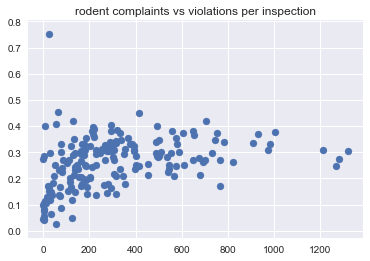

In [66]:
plt.scatter(df_rodents.complaints, df_rodents.vio_per_insp)
plt.title("rodent complaints vs violations per inspection")
plt.show()

In [ ]:
formula = "vio_per_insp ~ complaints"
model = ols(formula= formula, data=df_rodents_ols).fit()

In [ ]:
outcome = 'vio_per_insp'
predictors = df_rodents_ols.drop('vio_per_insp', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [ ]:
model = ols(formula= formula, data=df_rodents_ols).fit()
model.summary()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = df_rodents_ols['vio_per_insp']
linreg = LinearRegression()
linreg.fit(predictors, y)

In [ ]:
linreg.coef_

In [ ]:
linreg.intercept_

In [114]:
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df_rodents_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        violation_count   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     477.9
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           9.81e-86
Time:                        15:05:51   Log-Likelihood:                -935.89
No. Observations:                 185   AIC:                             1880.
Df Residuals:                     181   BIC:                             1893.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -76.6054     55.147     -1.389      0.167    -185.419      32.208
ZIPCODE         0.0065      0.005      1.290      0.199      -0.003       0.016
inspections     0.2491      0.007     34.680      0.000       0.235       0.263
complaints      0.0505      0.011      4.697      0.000       0.029       0.072
==============================================================================
Omnibus:                       42.095   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.730
Skew:                           0.261   Prob(JB):                    6.90e-115
Kurtosis:                      11.242   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

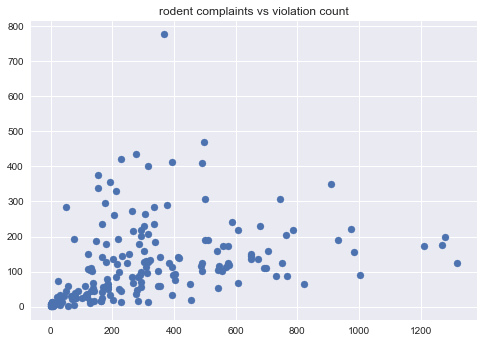

In [88]:
plt.scatter(df_rodents.complaints, df_rodents.violation_count)
plt.title("rodent complaints vs violation count")
plt.show()

In [125]:
df_rodents_ols['vio_per_ins'] = df_rodents_ols['violation_count'] / df_rodents_ols['inspections']

In [126]:
df_rodents_ols.head(2)

,ZIPCODE,inspections,violation_count,complaints,vio_per_ins
0,10003.0,2203,777,366,0.352701
1,10019.0,2143,355,192,0.165656


In [132]:
df_rodent_ols2 = df_rodents_ols.drop(['ZIPCODE', 'inspections', 'violation_count'], axis=1)

In [133]:
df_rodent_ols2.head(2)

,complaints,vio_per_ins
0,366,0.352701
1,192,0.165656


In [134]:
formula = "vio_per_ins ~ complaints"
model = ols(formula= formula, data=df_rodent_ols2).fit()

In [135]:
outcome = 'vio_per_ins'
predictors = df_rodent_ols2.drop('vio_per_ins', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [136]:
model = ols(formula= formula, data=df_rodent_ols2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            vio_per_ins   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     24.12
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           2.00e-06
Time:                        15:20:58   Log-Likelihood:                 178.92
No. Observations:                 185   AIC:                            -353.8
Df Residuals:                     183   BIC:                            -347.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2239      0.010     21.520      0.000       0.203       0.244
complaints     0.0001    2.5e-05      4.911      0.000    7.34e-05       0.000
==============================================================================
Omnibus:                       45.235   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.696
Skew:                           0.874   Prob(JB):                     7.05e-39
Kurtosis:                       7.443   Cond. No.                         637.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
import numpy as np

In [153]:
import pylab

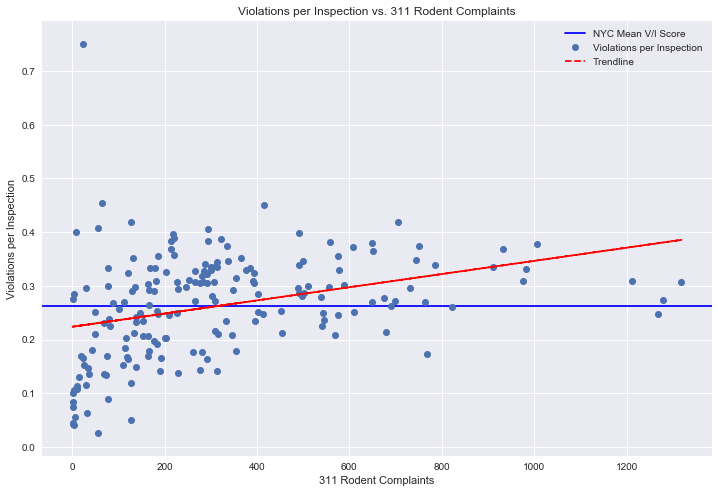

In [169]:
area = np.pi*10
y = df_rodent_ols2.vio_per_ins
x = df_rodent_ols2.complaints

plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=area, alpha=1)
plt.title('Violations per Inspection vs. 311 Rodent Complaints')
plt.xlabel('311 Rodent Complaints')
plt.ylabel('Violations per Inspection')

plt.axhline(df_rodent_ols2.vio_per_ins.mean(), color='b')

pylab.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")

plt.legend(('NYC Mean V/I Score', 'Violations per Inspection', 'Trendline'))

plt.show()

In [164]:
df_rodent_ols3 = df_rodent_ols2[df_rodent_ols2['vio_per_ins'] < 0.75]

In [165]:
formula = "vio_per_ins ~ complaints"
model = ols(formula= formula, data=df_rodent_ols3).fit()

In [166]:
outcome = 'vio_per_ins'
predictors = df_rodent_ols3.drop('vio_per_ins', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [167]:
model = ols(formula= formula, data=df_rodent_ols3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            vio_per_ins   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     34.51
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           1.98e-08
Time:                        15:34:49   Log-Likelihood:                 195.36
No. Observations:                 184   AIC:                            -386.7
Df Residuals:                     182   BIC:                            -380.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2175      0.010     22.845      0.000       0.199       0.236
complaints     0.0001   2.28e-05      5.875      0.000     8.9e-05       0.000
==============================================================================
Omnibus:                        1.461   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.281
Skew:                          -0.024   Prob(JB):                        0.527
Kurtosis:                       2.594   Cond. No.                         641.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

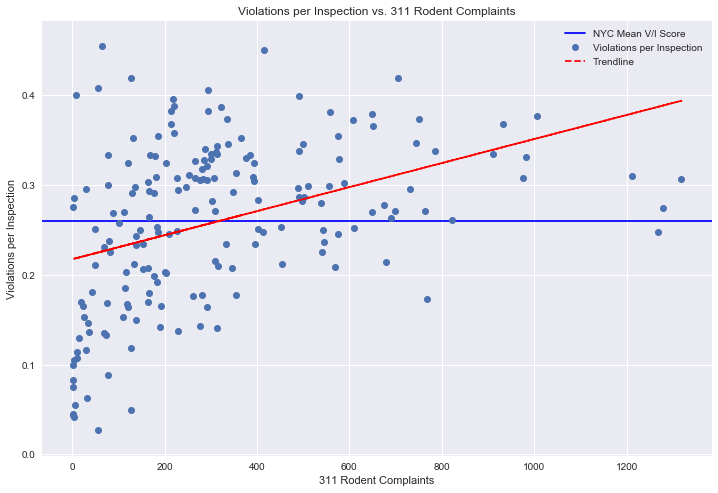

In [168]:
area = np.pi*10
y = df_rodent_ols3.vio_per_ins
x = df_rodent_ols3.complaints

plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=area, alpha=1)
plt.title('Violations per Inspection vs. 311 Rodent Complaints')
plt.xlabel('311 Rodent Complaints')
plt.ylabel('Violations per Inspection')

plt.axhline(df_rodent_ols3.vio_per_ins.mean(), color='b')

pylab.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")

plt.legend(('NYC Mean V/I Score', 'Violations per Inspection', 'Trendline'))

plt.show()